In [1]:
import warnings
warnings.filterwarnings("ignore")

In [71]:
import pandas as pd
import numpy as np
import zipfile 
import io
import os
import concurrent.futures
import time
import subprocess
import multiprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [3]:
# Extract the zip and save in interim
data_folder = '../data'
zip_flight_data= data_folder + '/raw/itineraries_csv.zip'

extract_directory = data_folder +'/interim'

# Read the zip file
with zipfile.ZipFile(zip_flight_data, 'r') as z:
    z.extractall(extract_directory)

print(f"Extracted {zip_flight_data} to {extract_directory}")



Extracted ../data/raw/itineraries_csv.zip to ../data/interim


In [4]:
df_dict = {}

def process_folder(folder):
    def read_csv_generator(folder):
        files = os.listdir(f"../data/interim/itineraries_csv/{folder}")
        for file in files:
            file_path = f"../data/interim/itineraries_csv/{folder}/{file}"
            if file.endswith('.zip'):
                yield pd.read_csv(file_path, compression='zip')

    df_list = list(read_csv_generator(folder))
    if df_list:
        df_folder = pd.concat(df_list)
        df_folder.to_csv(f"../data/interim/itineraries_csv/{folder}.csv", index=False)
        print(f"Saved {folder}.csv")
        df_dict[folder] = df_folder  # Storing DataFrame in df_dict

# List of folders (e.g., airport codes)
folders = os.listdir("../data/interim/itineraries_csv")

# Limit the number of threads
max_threads = 4

# Measure execution time
start_time = time.time()

# Use ThreadPoolExecutor with a limited number of threads
with concurrent.futures.ThreadPoolExecutor(max_workers=max_threads) as executor:
    executor.map(process_folder, folders)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time:.2f} seconds")

# Check if df_dict is populated with folder names as keys
print(df_dict.keys())

# Now you should be able to access individual DataFrames, like 'OAK'
if 'OAK' in df_dict:
    print(df_dict['OAK'].shape)
else:
    print("OAK not found in df_dict")


Saved OAK.csv
Saved DEN.csv
Saved LGA.csv
Saved LAX.csv
Saved ATL.csv
Saved CLT.csv
Saved PHL.csv
Saved DTW.csv
Saved IAD.csv
Saved JFK.csv
Saved DFW.csv
Saved EWR.csv
Saved BOS.csv
Saved SFO.csv
Saved ORD.csv
Saved MIA.csv
Execution time: 263.02 seconds
dict_keys(['OAK', 'DEN', 'LGA', 'LAX', 'ATL', 'CLT', 'PHL', 'DTW', 'IAD', 'JFK', 'DFW', 'EWR', 'BOS', 'SFO', 'ORD', 'MIA'])
(527105, 23)


In [5]:
df_dict['DEN'].shape

(770429, 23)

In [6]:
df_combined = pd.concat([df_dict[code] for code in df_dict.keys() if code in df_dict])

df_combined.shape

(13519999, 23)

In [96]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 685.1/685.1 kB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 5.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [97]:
df_combined.to_parquet('master_data.parquet', index=False)


In [7]:
df_dict['DEN'].isnull().sum()

legId                                    0
searchDate                               0
flightDate                               0
startingAirport                          0
destinationAirport                       0
travelDuration                           0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
totalFare                                0
totalTravelDistance                  35110
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEquipmentDescription         14815
segmentsDurationInSeconds                0
segmentsDistance                      2774
segmentsCabinCode                        0
dtype: int6

In [22]:
df_dict['DEN'].head(50)

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,c4c15e7477db14816d98a386e73565f3,2022-05-18,2022-06-06,DEN,DTW,PT5H54M,False,False,False,544.60,...,1654527000||1654540920,2022-06-06T09:50:00.000-05:00||2022-06-06T14:4...,DFW||DTW,DEN||DFW,American Airlines||American Airlines,AA||AA,Airbus A321||Boeing 737-800,7320||9720,650||995,coach||coach
1,70ab7b83ef88886725bbe8e303178a3b,2022-05-18,2022-06-06,DEN,DTW,PT6H24M,False,False,False,548.60,...,1654540980||1654557060,2022-06-06T13:43:00.000-05:00||2022-06-06T19:1...,DFW||DTW,DEN||DFW,American Airlines||American Airlines,AA||AA,Airbus A321||Boeing 737-800,6960||9540,650||995,coach||coach
2,f97c09a0c43c5cd3614d3dade8a18e8b,2022-05-18,2022-06-06,DEN,DTW,PT4H42M,False,False,False,651.60,...,1654553220||1654560900,2022-06-06T17:07:00.000-05:00||2022-06-06T20:1...,ORD||DTW,DEN||ORD,United||United,UA||UA,Boeing 737-900||Embraer 175 (Enhanced Winglets),9240||5100,903||240,coach||coach
3,330f7175c4ed2c518e46fca1155af3f7,2022-05-18,2022-06-06,DEN,EWR,PT3H41M,False,False,True,237.60,...,1654577100,2022-06-07T00:45:00.000-04:00,EWR,DEN,United,UA,Boeing 737-900,13260,1621,coach
4,b92770186538da8daaf0e3fae6471ecf,2022-05-18,2022-06-06,DEN,EWR,PT6H51M,False,False,False,307.60,...,1654593480||1654606200,2022-06-07T05:18:00.000-04:00||2022-06-07T08:5...,IAD||EWR,DEN||IAD,United||United,UA||UA,Boeing 737-900||Airbus A320,11940||4620,1473||221,coach||coach
5,2076fc11556a9e3f287d2384ea9e9aca,2022-05-18,2022-06-06,DEN,EWR,PT8H6M,False,False,False,307.60,...,1654593480||1654610700,2022-06-07T05:18:00.000-04:00||2022-06-07T10:0...,IAD||EWR,DEN||IAD,United||United,UA||UA,Boeing 737-900||Boeing 757-200,11940||4800,1473||221,coach||coach
6,334e18cba75f74312b823b168a0caf1b,2022-05-18,2022-06-06,DEN,EWR,PT6H42M,False,False,False,316.10,...,1654565400||1654577340,2022-06-06T21:30:00.000-04:00||2022-06-07T00:4...,CLT||EWR,DEN||CLT,American Airlines||American Airlines,AA||AA,Airbus A321||Boeing 737-800,12180||6900,1346||545,coach||coach
7,832e326435954751014912e3b583130a,2022-05-18,2022-06-06,DEN,EWR,PT9H45M,False,False,False,317.58,...,1654530780||1654551900,2022-06-06T11:53:00.000-04:00||2022-06-06T17:4...,FLL||EWR,DEN||FLL,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A321 SHARKLETS,13980||11280,None||None,coach||coach
8,a02d8855961564b46c42f9f148244ea2,2022-05-18,2022-06-06,DEN,EWR,PT5H49M,False,False,False,328.60,...,1654508700||1654519440,2022-06-06T05:45:00.000-04:00||2022-06-06T08:4...,DTW||EWR,DEN||DTW,Delta||Delta,DL||DL,Boeing 737-900||Airbus A220-100,10200||5940,1142||485,coach||coach
9,76e60615dd2442ebaab6c2d7feb11585,2022-05-18,2022-06-06,DEN,EWR,PT3H42M,False,False,True,338.61,...,1654530120,2022-06-06T11:42:00.000-04:00,EWR,DEN,United,UA,Boeing 737-900,13320,1621,coach


In [23]:
from datetime import datetime

# Example timestamps
timestamp1 = 1654527000
timestamp2 = 1654540920

# Convert to human-readable format
arrival_time_1 = datetime.fromtimestamp(timestamp1).strftime('%Y-%m-%d %H:%M:%S')
arrival_time_2 = datetime.fromtimestamp(timestamp2).strftime('%Y-%m-%d %H:%M:%S')

print("Segment 1 Arrival Time:", arrival_time_1)
print("Segment 2 Arrival Time:", arrival_time_2)

Segment 1 Arrival Time: 2022-06-07 00:50:00
Segment 2 Arrival Time: 2022-06-07 04:42:00


In [9]:
print(df_combined.columns)

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')


In [20]:
df_combined.value_counts('isRefundable')

isRefundable
False    13519808
True          191
Name: count, dtype: int64

In [25]:
df_combined.value_counts('isBasicEconomy')

isBasicEconomy
False    12768661
True       751338
Name: count, dtype: int64

In [67]:
df_combined.value_counts('segmentsEquipmentDescription')

segmentsEquipmentDescription
Boeing 737-800                                             737328
Airbus A321                                                643601
Boeing 737-800||Boeing 737-800                             352993
Airbus A320                                                313890
Airbus A321||Airbus A321                                   308010
                                                            ...  
Embraer 175 (Enhanced Winglets)||Boeing 717||Boeing 717         1
Boeing 737-700||Airbus A319||Canadian Regional Jet 700          1
Embraer 175 (Enhanced Winglets)||Boeing 717||                   1
Boeing 737-700||Airbus A319||Embraer EMB-145                    1
||||Embraer 175 (Enhanced Winglets)||Embraer 170                1
Name: count, Length: 6882, dtype: int64

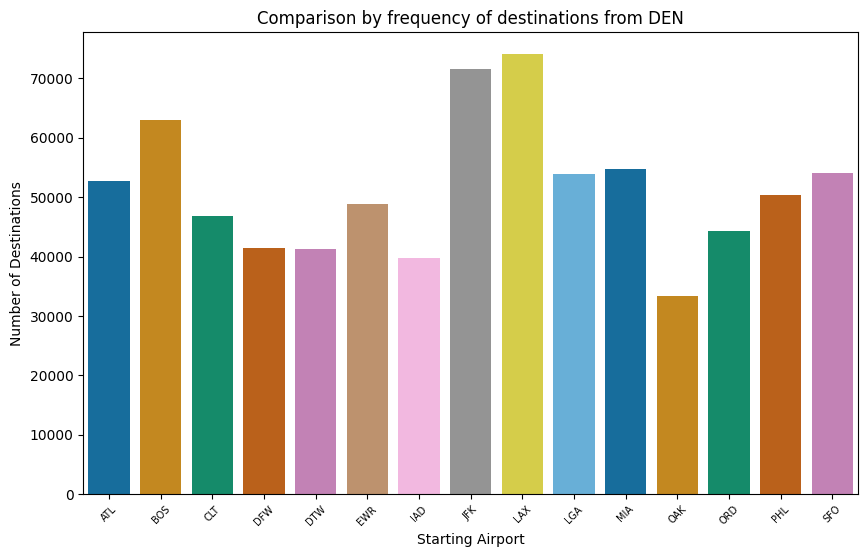

In [11]:
# Group by 'startingAirport' and count occurrences of 'destinationAirport'
destination_from_den = df_dict['DEN'].groupby('destinationAirport').size().reset_index(name='count')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='destinationAirport', y='count', data=destination_from_den, palette='colorblind')

plt.title('Comparison by frequency of destinations from DEN')
plt.xlabel('Starting Airport', fontsize=10)
plt.ylabel('Number of Destinations', fontsize=10)
plt.xticks(rotation=45, fontsize=7)

plt.show()


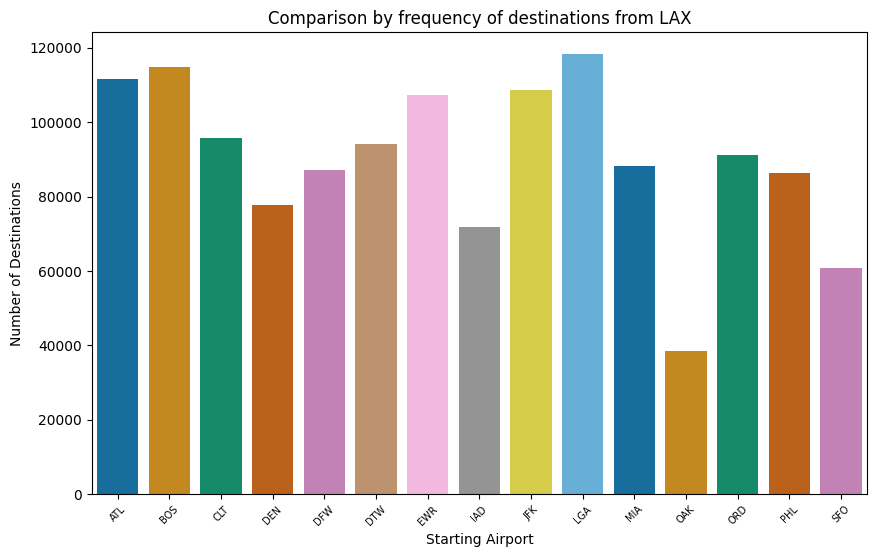

In [12]:
# Group by 'startingAirport' and count occurrences of 'destinationAirport'
destination_from_den = df_dict['LAX'].groupby('destinationAirport').size().reset_index(name='count')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='destinationAirport', y='count', data=destination_from_den, palette='colorblind')

plt.title('Comparison by frequency of destinations from LAX')
plt.xlabel('Starting Airport', fontsize=10)
plt.ylabel('Number of Destinations', fontsize=10)
plt.xticks(rotation=45, fontsize=7)

plt.show()


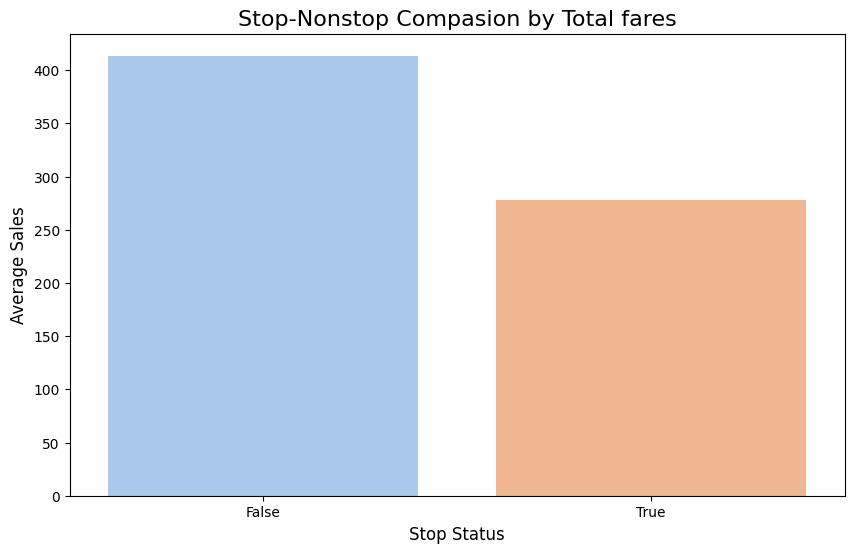

In [13]:
stop_non_stop = df_combined.groupby('isNonStop')['totalFare'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='isNonStop', y='totalFare', data=stop_non_stop, palette='pastel')

plt.title('Stop-Nonstop Compasion by Total fares', fontsize=16)
plt.xlabel('Stop Status', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

plt.show()

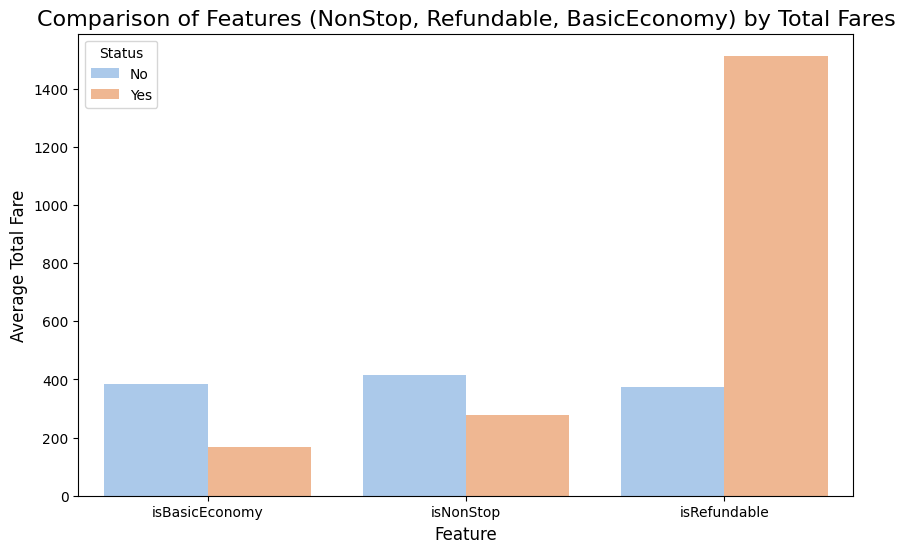

In [14]:
# Select the relevant columns (boolean features and 'totalFare')
bool_columns = ['isNonStop', 'isRefundable', 'isBasicEconomy']

# Melt the DataFrame to long format
df_melted = df_combined.melt(id_vars='totalFare', value_vars=bool_columns, 
                             var_name='Feature', value_name='Status')

# Group by 'Feature' and 'Status' to get the average 'totalFare'
feature_fare_comparison = df_melted.groupby(['Feature', 'Status'])['totalFare'].mean().reset_index()

# Map True/False to more descriptive labels
feature_fare_comparison['Status'] = feature_fare_comparison['Status'].map({True: 'Yes', False: 'No'})

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='totalFare', hue='Status', data=feature_fare_comparison, palette='pastel')

# Title and labels
plt.title('Comparison of Features (NonStop, Refundable, BasicEconomy) by Total Fares', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Average Total Fare', fontsize=12)

plt.show()


In [15]:
df_eda = df_combined.copy()

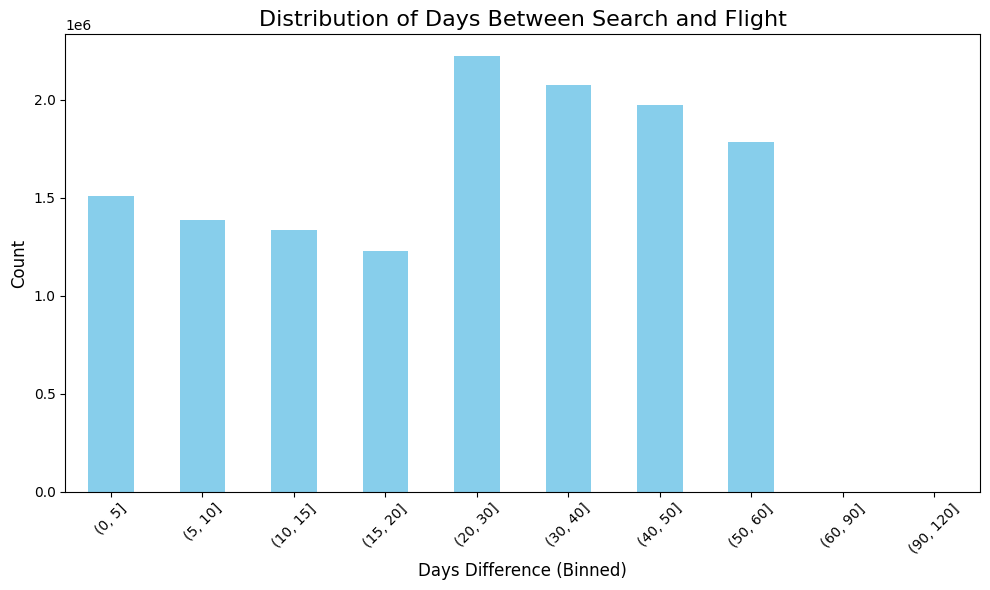

In [19]:
df_eda['searchDate'] = pd.to_datetime(df_eda['searchDate'])
df_eda['flightDate'] = pd.to_datetime(df_eda['flightDate'])

# Calculate the difference in days
df_eda['date_diff'] = (df_eda['flightDate'] - df_eda['searchDate']).dt.days

# Define bins (you can customize this)
bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 90, 120]
df_eda['binned_diff'] = pd.cut(df_eda['date_diff'], bins)

# Plot the distribution
plt.figure(figsize=(10, 6))
df_eda['binned_diff'].value_counts(sort=False).plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Distribution of Days Between Search and Flight', fontsize=16)
plt.xlabel('Days Difference (Binned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()


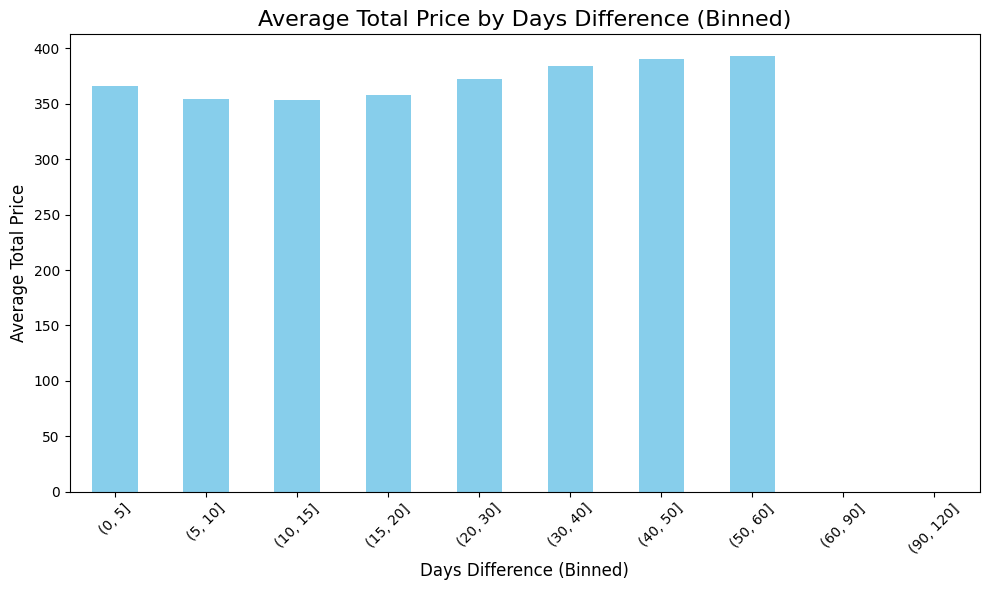

In [48]:
avg_price_per_bin = df_eda.groupby('binned_diff')['totalFare'].mean()

# Plot the distribution of average prices by binned_diff
plt.figure(figsize=(10, 6))
avg_price_per_bin.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Total Price by Days Difference (Binned)', fontsize=16)
plt.xlabel('Days Difference (Binned)', fontsize=12)
plt.ylabel('Average Total Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
def analyze_stopover_frequency(df):
    # Calculate date difference in days
    df['date_diff'] = (pd.to_datetime(df['flightDate']) - pd.to_datetime(df['searchDate'])).dt.days

    # Calculate the number of segments based on `segmentsDurationInSeconds`
    df['num_segments'] = df['segmentsDurationInSeconds'].apply(lambda x: x.count('||') + 1)

    # Define bins for the date difference (customize as needed)
    bins = [0, 5, 10, 15, 20, 30, 40, 50, 60, 90, 120]
    df['date_diff_bins'] = pd.cut(df['date_diff'], bins)

    # Group by binned date difference and calculate the average number of segments
    result = df.groupby('date_diff_bins')['num_segments'].mean().reset_index()

    # Rename columns for clarity
    result.columns = ['Date Difference (Days)', 'Average Number of Segments']

    return result

# Run the analysis
result = analyze_stopover_frequency(df_eda)
print(result)


  Date Difference (Days)  Average Number of Segments
0                 (0, 5]                    1.815180
1                (5, 10]                    1.796901
2               (10, 15]                    1.797319
3               (15, 20]                    1.791176
4               (20, 30]                    1.780314
5               (30, 40]                    1.770588
6               (40, 50]                    1.767531
7               (50, 60]                    1.769464
8               (60, 90]                         NaN
9              (90, 120]                         NaN


Data preprocessing

In [58]:
df_pre = df_dict['DEN'].copy()

In [66]:
def add_time_difference_columns(df, search_date_col, flight_date_col):
    """
    Adds two columns to the DataFrame:
    - 'date_diff_days': the difference in days between flight_date_col and search_date_col
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the columns to process.
        search_date_col (str): The name of the search date column.
        flight_date_col (str): The name of the flight date column.
        departure_time_col (str): The name of the column with epoch time for departure.

    Returns:
        pd.DataFrame: The DataFrame with the added columns.
    """
    
    # Convert search and flight dates to datetime if not already in datetime format
    df[search_date_col] = pd.to_datetime(df[search_date_col])
    df[flight_date_col] = pd.to_datetime(df[flight_date_col])
    df['weekday'] = df[flight_date_col].dt.weekday

    # Calculate the difference in days
    # Calculate sin, cos to train cyclical patterns
    df['date_diff_days'] = (df[flight_date_col] - df[search_date_col]).dt.days
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

    
    return df


In [29]:
columns_to_split = [
    'segmentsDepartureTimeEpochSeconds', 'segmentsArrivalTimeEpochSeconds', 
    'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 
    'segmentsAirlineName', 'segmentsAirlineCode', 
    'segmentsEquipmentDescription', 'segmentsDurationInSeconds', 
    'segmentsDistance', 'segmentsCabinCode'
]

# Function to split each column by '||' and expand into multiple rows
def split_segments(df, columns):
    # Create a list to store each expanded row as a DataFrame
    expanded_rows = []
    
    # Iterate through each row in the DataFrame
    for _, row in df.iterrows():
        # Split the columns with '||' separator and find the maximum number of segments
        segments = {col: row[col].split('||') if '||' in str(row[col]) else [row[col]] for col in columns}
        max_segments = max(len(v) for v in segments.values())
        
        # Expand each column to have the same length as max_segments, filling single values where necessary
        expanded_row = pd.DataFrame({col: v if len(v) == max_segments else v * max_segments for col, v in segments.items()})
        
        # Append the expanded DataFrame for each row
        expanded_rows.append(expanded_row)
    
    # Concatenate all expanded rows
    expanded_df = pd.concat(expanded_rows, ignore_index=True)
    return expanded_df

In [46]:
def split_columns(df, column_name):
    # Check if the column contains '||' and split accordingly
    split_data = df[column_name].str.split('||', expand=True)
    
    # If the split results in a single column, ensure it's not empty and rename it correctly
    if split_data.shape[1] == 1:
        df[f'{column_name}_1'] = split_data[0]
    else:
        # Assign unique names to the new columns
        for i in range(split_data.shape[1]):
            df[f'{column_name}_{i + 1}'] = split_data[i]
    
    return df


In [47]:
# Apply the function to each column
for column in columns_to_split:
    df_pre = split_columns(df_pre, column)

# Print the updated DataFrame
print(df_pre)

                                 legId  searchDate  flightDate  \
0     c4c15e7477db14816d98a386e73565f3  2022-05-18  2022-06-06   
1     70ab7b83ef88886725bbe8e303178a3b  2022-05-18  2022-06-06   
2     f97c09a0c43c5cd3614d3dade8a18e8b  2022-05-18  2022-06-06   
3     330f7175c4ed2c518e46fca1155af3f7  2022-05-18  2022-06-06   
4     b92770186538da8daaf0e3fae6471ecf  2022-05-18  2022-06-06   
...                                ...         ...         ...   
1382  00ccd9fc83444ddbc7dcca1263abc6be  2022-05-18  2022-07-08   
1383  50694012a498a2e6ee7b9affe95c55b5  2022-05-18  2022-07-08   
1384  6267f05bf1ff3bd5d6bd9559fd7bf0ff  2022-05-18  2022-07-08   
1385  cb003749b772d90a9e3c9102bd48e837  2022-05-18  2022-07-08   
1386  218e0a5dacf8120eaf4e478114cc410a  2022-05-18  2022-07-08   

     startingAirport destinationAirport travelDuration  isBasicEconomy  \
0                DEN                DTW        PT5H54M           False   
1                DEN                DTW        PT6H24M     

In [61]:
df_pre = add_time_difference_columns(df_pre, 'searchDate', 'flightDate')

In [62]:
print(df_pre.columns)

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'totalFare', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode', 'day', 'weekday',
       'date_diff_days', 'day_sin', 'day_cos'],
      dtype='object')


In [73]:
df_pre.value_counts('startingAirport')

startingAirport
DEN    770429
Name: count, dtype: int64

In [74]:
# Covert the segment data into new variables

airports= ['ATL','BOS','DEN','DFW','EWR','JFK','LAX','LGA','MIA','OAK','ORD','PHL','SFO']
# dictionary for the correct time offsets
time_offsets = {'ATL': '-04:00', 'BOS' : '-04:00' , 'DEN':'-06:00', 'DFW':'-05:00' ,'EWR':'-04:00',   'JFK': '-04:00','LAX': '-07:00', 'LGA': '-04:00', 'MIA': '-04:00', 'OAK': '-07:00', 'ORD': '-05:00', 'PHL': '-04:00', 'SFO': '-07:00'}

# Departure Hour Processing
def process_segments_DepartTime(df):
    # Split the departure time
    print("Shape before processing: ", df.shape)
    df["segmentsDepartureTimeRaw_hour"] = df["segmentsDepartureTimeRaw"].str.split("|").str[0]
    airportcode = df["startingAirport"].iloc[0]
    correct_time_offset = time_offsets[airportcode]

    # filter for departure time hour that has the correct time offset
    df = df[df["segmentsDepartureTimeRaw_hour"].str[-6:] == correct_time_offset]
    print("Shape after processing departure time: ", df.shape)

    # check date difference between the  segmentsDepartureTimeRaw_hour aNd flight date and eliminate any that dont match
    df["segmentsDepartureTimeRaw_hour"] = pd.to_datetime(
        df["segmentsDepartureTimeRaw_hour"]
    ).dt.tz_localize(None)
    df = df[(df["segmentsDepartureTimeRaw_hour"] - df["flightDate"]).dt.days == 0]
    print("Shape after filtering segment departure not the same as flight date: ", df.shape)

    # extract out the hour of the day
    df["segmentsDepartureTimeRaw_hour"] = df["segmentsDepartureTimeRaw_hour"].dt.hour.astype("int8")

    return df

# Cabin Class Encoding
cabin_class_encoding = {
    "coach": 1,
    "premium coach": 2,
    "business": 3,
    "first": 4,
}

def process_segments_CabinClass(df):
    # Split the Cabin class
    df["CabinCode"] = df["segmentsCabinCode"].str.split("\\|\\|")
    
    # apply cabin_class_encoding on the cabin class
    df["CabinCode"] = df["CabinCode"].apply(lambda x: [cabin_class_encoding.get(i, 0) for i in x])

    # get the average of the cabin class
    df["CabinCode"] = df["CabinCode"].apply(lambda x: np.mean(x) if isinstance(x, list) else x)

    return df

# Airline Name Processing

# Airline Encoding 
# 1: Ultra Low Cost, 2: Budget, 3: Regional, 4: Full Service
airline_type_encoding = {
    'JetBlue Airways': 2,
    'Sun Country Airlines': 2,
    'United': 4,
    'Delta': 4,
    'Key Lime Air': 3,
    'Boutique Air': 3,
    'Contour Airlines': 3,
    'Spirit Airlines': 1,
    'American Airlines': 4,
    'Alaska Airlines': 4,
    'Southern Airways Express': 3,
    'Frontier Airlines': 1,
    'Hawaiian Airlines': 4,
    'Cape Air': 3
}

# Airline Category Mapping
def process_segments_AirlineNameScore(df):
    df["AirlineNameScore"] = df["segmentsAirlineName"].str.split("\\|\\|")
    df["AirlineNameScore"] = df["AirlineNameScore"].apply(lambda x: [airline_type_encoding.get(i, 0) for i in x])
    df["AirlineNameScore"]= df["AirlineNameScore"].apply(lambda x: np.max(x) if isinstance(x, list) else x) 
    return df

In [75]:
process_segments_DepartTime(df_pre)

Shape before processing:  (770429, 29)
Shape after processing departure time:  (770429, 29)
Shape after filtering segment departure not the same as flight date:  (770429, 29)


,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,day,weekday,date_diff_days,day_sin,day_cos,segmentsDepartureTimeRaw_hour
0,c4c15e7477db14816d98a386e73565f3,2022-05-18,2022-06-06,DEN,DTW,PT5H54M,False,False,False,544.6,...,Airbus A321||Boeing 737-800,7320||9720,650||995,coach||coach,6,0,19,0.937752,0.347305,6
1,70ab7b83ef88886725bbe8e303178a3b,2022-05-18,2022-06-06,DEN,DTW,PT6H24M,False,False,False,548.6,...,Airbus A321||Boeing 737-800,6960||9540,650||995,coach||coach,6,0,19,0.937752,0.347305,10
2,f97c09a0c43c5cd3614d3dade8a18e8b,2022-05-18,2022-06-06,DEN,DTW,PT4H42M,False,False,False,651.6,...,Boeing 737-900||Embraer 175 (Enhanced Winglets),9240||5100,903||240,coach||coach,6,0,19,0.937752,0.347305,13
3,330f7175c4ed2c518e46fca1155af3f7,2022-05-18,2022-06-06,DEN,EWR,PT3H41M,False,False,True,237.6,...,Boeing 737-900,13260,1621,coach,6,0,19,0.937752,0.347305,19
4,b92770186538da8daaf0e3fae6471ecf,2022-05-18,2022-06-06,DEN,EWR,PT6H51M,False,False,False,307.6,...,Boeing 737-900||Airbus A320,11940||4620,1473||221,coach||coach,6,0,19,0.937752,0.347305,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,00ccd9fc83444ddbc7dcca1263abc6be,2022-05-18,2022-07-08,DEN,SFO,PT6H3M,False,False,False,441.6,...,Boeing 737-900||Boeing 737-900,9480||6480,983||550,coach||coach,8,4,51,0.998717,-0.050649,17
1383,50694012a498a2e6ee7b9affe95c55b5,2022-05-18,2022-07-08,DEN,SFO,PT5H54M,False,False,False,481.6,...,Boeing 737-900||Airbus A320,10800||7740,1017||679,coach||coach,8,4,51,0.998717,-0.050649,18
1384,6267f05bf1ff3bd5d6bd9559fd7bf0ff,2022-05-18,2022-07-08,DEN,SFO,PT6H50M,False,False,False,491.6,...,Boeing 737-900||Airbus A320,11100||8400,1017||679,coach||coach,8,4,51,0.998717,-0.050649,6
1385,cb003749b772d90a9e3c9102bd48e837,2022-05-18,2022-07-08,DEN,SFO,PT6H50M,False,False,False,515.6,...,Embraer 175||Embraer 175,8820||4800,848||339,coach||coach,8,4,51,0.998717,-0.050649,13


In [78]:
process_segments_CabinClass(df_pre)
process_segments_AirlineNameScore(df_pre)

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsDistance,segmentsCabinCode,day,weekday,date_diff_days,day_sin,day_cos,segmentsDepartureTimeRaw_hour,CabinCode,AirlineNameScore
0,c4c15e7477db14816d98a386e73565f3,2022-05-18,2022-06-06,DEN,DTW,PT5H54M,False,False,False,544.6,...,650||995,coach||coach,6,0,19,0.937752,0.347305,2022-06-06T06:48:00.000-06:00,1.0,4
1,70ab7b83ef88886725bbe8e303178a3b,2022-05-18,2022-06-06,DEN,DTW,PT6H24M,False,False,False,548.6,...,650||995,coach||coach,6,0,19,0.937752,0.347305,2022-06-06T10:47:00.000-06:00,1.0,4
2,f97c09a0c43c5cd3614d3dade8a18e8b,2022-05-18,2022-06-06,DEN,DTW,PT4H42M,False,False,False,651.6,...,903||240,coach||coach,6,0,19,0.937752,0.347305,2022-06-06T13:33:00.000-06:00,1.0,4
3,330f7175c4ed2c518e46fca1155af3f7,2022-05-18,2022-06-06,DEN,EWR,PT3H41M,False,False,True,237.6,...,1621,coach,6,0,19,0.937752,0.347305,2022-06-06T19:04:00.000-06:00,1.0,4
4,b92770186538da8daaf0e3fae6471ecf,2022-05-18,2022-06-06,DEN,EWR,PT6H51M,False,False,False,307.6,...,1473||221,coach||coach,6,0,19,0.937752,0.347305,2022-06-06T23:59:00.000-06:00,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,00ccd9fc83444ddbc7dcca1263abc6be,2022-05-18,2022-07-08,DEN,SFO,PT6H3M,False,False,False,441.6,...,983||550,coach||coach,8,4,51,0.998717,-0.050649,2022-07-08T17:15:00.000-06:00,1.0,4
1383,50694012a498a2e6ee7b9affe95c55b5,2022-05-18,2022-07-08,DEN,SFO,PT5H54M,False,False,False,481.6,...,1017||679,coach||coach,8,4,51,0.998717,-0.050649,2022-07-08T18:50:00.000-06:00,1.0,4
1384,6267f05bf1ff3bd5d6bd9559fd7bf0ff,2022-05-18,2022-07-08,DEN,SFO,PT6H50M,False,False,False,491.6,...,1017||679,coach||coach,8,4,51,0.998717,-0.050649,2022-07-08T06:00:00.000-06:00,1.0,4
1385,cb003749b772d90a9e3c9102bd48e837,2022-05-18,2022-07-08,DEN,SFO,PT6H50M,False,False,False,515.6,...,848||339,coach||coach,8,4,51,0.998717,-0.050649,2022-07-08T13:35:00.000-06:00,1.0,4


In [85]:
selected_features = ['date_diff_days', 'weekday', 'day_sin', 'day_cos', 'CabinCode', 'AirlineNameScore']
categorical_features = ['startingAirport', 'destinationAirport']
target = 'totalFare'

df_filtered = df_pre[categorical_features + selected_features + [target]]

In [86]:
df_filtered.isnull().sum()

startingAirport       0
destinationAirport    0
date_diff_days        0
weekday               0
day_sin               0
day_cos               0
CabinCode             0
AirlineNameScore      0
totalFare             0
dtype: int64

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression

numerical_features = ['day_sin', 'day_cos']

preprocessor = ColumnTransformer(
    transformers=[
        ('one-hot', OneHotEncoder(handle_unknown='ignore'), categorical_features),  
        ('scaler', StandardScaler(), numerical_features) 
    ],
    remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) 
])


In [88]:
from sklearn.model_selection import train_test_split


# Split the datasets
df_data, df_test = train_test_split(df_filtered, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_data, test_size=0.2, random_state=42)

X_train = df_train.drop(columns=[target], axis=1)  
y_train = df_train[target]

X_val = df_val.drop(columns=[target], axis=1)  
y_val = df_val[target]

X_test = df_test.drop(columns=[target], axis=1)  
y_test = df_test[target]

In [89]:
pipeline.fit(X_train, y_train)

y_preds = pipeline.predict(X_train)
y_val_preds = pipeline.predict(X_val)
y_test_preds = pipeline.predict(X_test)

In [91]:
class NullRegressor:
    """
    Class used as baseline model for regression problem
    ...

    Attributes
    ----------
    y : Numpy Array-like
        Target variable
    pred_value : Float
        Value to be used for prediction
    preds : Numpy Array
        Predicted array

    Methods
    -------
    fit(y)
        Store the input target variable and calculate the predicted value to be used
    predict(y)
        Generate the predictions
    fit_predict(y)
        Perform a fit followed by predict
    """


    def __init__(self):
        self.y = None
        self.pred_value = None
        self.preds = None

    def fit(self, y):
        self.y = y
        self.pred_value = y.mean()

    def predict(self, y):
        self.preds = np.full((len(y), 1), self.pred_value)
        return self.preds

    def fit_predict(self, y):
        self.fit(y)
        return self.predict(self.y)

In [92]:
base_model = NullRegressor()

y_base = base_model.fit_predict(y_train)


In [93]:
def print_regressor_scores(y_preds, y_actuals, set_name=None):
    """Print the RMSE and MAE for the provided data

    Parameters
    ----------
    y_preds : Numpy Array
        Predicted target
    y_actuals : Numpy Array
        Actual target
    set_name : str
        Name of the set to be printed

    Returns
    -------
    """
    from sklearn.metrics import root_mean_squared_error as rmse
    from sklearn.metrics import mean_absolute_error as mae

    print(f"RMSE {set_name}: {rmse(y_actuals, y_preds)}")
    print(f"MAE {set_name}: {mae(y_actuals, y_preds)}")

In [94]:
print_regressor_scores(y_preds=y_base, y_actuals=y_train, set_name='Training')
print_regressor_scores(y_preds=base_model.predict(y_val), y_actuals=y_val, set_name='Validation')
print_regressor_scores(y_preds=base_model.predict(y_test), y_actuals=y_test, set_name='Testing')

RMSE Training: 176.1247323252899
MAE Training: 129.9596834322731
RMSE Validation: 174.89282234652597
MAE Validation: 129.12442332733542
RMSE Testing: 176.78392833741205
MAE Testing: 130.17899250827142
